In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# <center>How to Train a Neural Network by Hand</center>

### Introduction

In this article, we will go through the mathematics behind training a simple neural network that solves a regression problem. We will be using an input variable x to predict an output variable y. It would be good to know a little about multivariate calculus, linear algebra, and linear regression to fully understand the mathematical processes explained in this article, but if not each step will be explained in detail.

Let's start by defining a few data points to train the models on.

In [2]:
df = pd.DataFrame({
    'x': [0.1, 0.3, 0.6, 0.7],
    'y':[0.2, 0.25, 0.4, 0.7],
})

## 1. Super Simple Neural Network

Let's start with a neural network that has a single input and single output. The output layer has a linear activation function. This is about as simple a neural network as you can get, but starting with this model makes the maths very intuitive. We will start by initializing the model with a weight of 0.5 and a bias of 0. The easiest way to pick these values is by randomizing weights with values between 0-1 and initializing biases with a value of 0.

Other ways of setting starting parameters include He Initialization and Xavier initialization which aim to mitigate exploding/vanishing gradients and speed up convergence, but these are beyond the scope of this article.

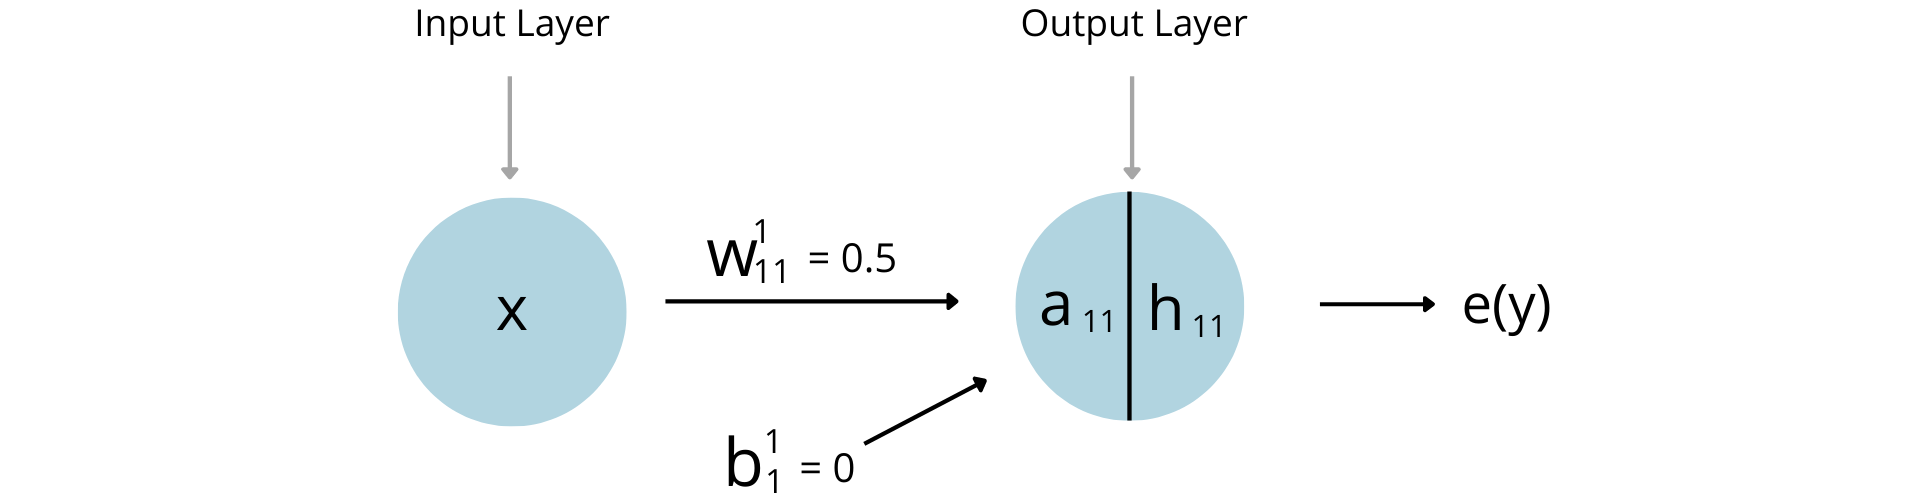

In [3]:
Image("../input/notebooknnimages/1.png")

#### Forward Pass

The first step is to pass our input variables through the model to gauge how well the initial model performs. This is called a forward pass. The entire formula for computing this is quite simple. 

In the following graphic, a(x) is the linear combination of the inputs to that node, and h(x) is the activation function that transforms the a(x). As we are using a linear activation function the linear combinations of the input do not change.

$$ h(x) = x $$

The entire forward pass is denoted by the following function. This may look familiar as this is the equation of a straight line. Math is cool.

$$ {f(x)} = {x \cdot w_{11}^1 + b_{1}^1} $$

So, by plugging in each data point, we can solve the equation to get our initial model predictions.

$$ {w_{11}^1} = 0.5, {b_{1}^1} = 0 $$

$$ = 0.1 \cdot 0.5 + 0 = 0.05 $$
$$ = 0.3 \cdot 0.5 + 0 = 0.15 $$
$$ = 0.6 \cdot 0.5 + 0 = 0.30 $$
$$ = 0.7 \cdot 0.5 + 0 = 0.35 $$

Then, we use an error function to determine how good our predictions are. In this case, we will be using 1/2 \* MSE (mean squared error). The reason we multiply by a factor of 1/2 is that it reduces the number of coefficients in the chained partial derivatives that we compute during backpropagation. Don't worry if this is unclear, I will explain it later in the article. The formula and computation of 1/2 \* MSE is shown below.

$$e(y) =  \frac{1}{2}{(y - \hat{y})^2}$$

$$
e(y) = \frac{1}{2}
(\begin{pmatrix} 0.20 \\ 0.25 \\ 0.40 \\ 0.70 \end{pmatrix} - 
\begin{pmatrix} 0.05 \\ 0.15 \\ 0.30 \\ 0.35 \end{pmatrix})^2 = 
\frac{1}{2}(\begin{pmatrix} 0.15 \\ 0.10 \\ 0.10 \\ 0.35 \end{pmatrix})^2= 
\frac{1}{2} \cdot {0.165} = 
0.0825
$$

We can then visualize the initial predictions using matplotlib. In the following plot, the blue points are the true labels and the orange values are the predicted points. The blue line shows how the neural network would classify other x values between 0-1. It is important to note that this line has a constant slope which is expected given the model equation is exactly that of a straight line. 

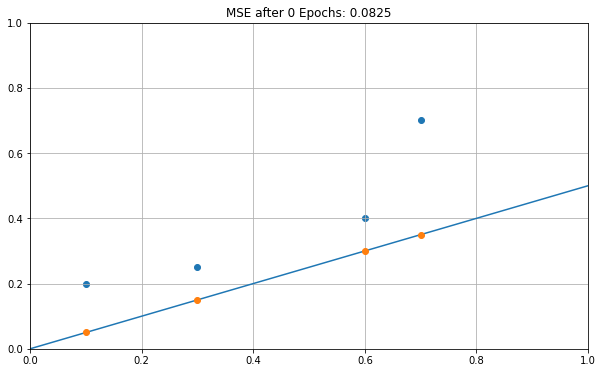

In [4]:
init_w11 = 0.5
init_b11 = 0
init_predictions = [0.05, 0.15, 0.30, 0.35]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, init_b11), slope=init_w11)
ax.scatter(df['x'], df['y'])
ax.scatter(df['x'], init_predictions, zorder=3)
ax.set_title("MSE after 0 Epochs: {}".format(0.0825))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
plt.show()

### Backpropagation

Looking at the graph above, you may be thinking that you can just pick a y-intercept and slope that makes better predictions. In this section, we will use a strategy called backpropagation that does just that. During backpropagation, we take the partial derivative of the error function with respect to each weight and bias in the model. The error function does not contain any weights or biases in its equation so we use the chain rule to do so. The result of this is a direction and magnitude in which each parameter should be tuned to minimize the error functions. This concept is called gradient descent.

### Weights: Partial Derivatives

Let's start by computing the partial derivative of the error with respect to the weight value. I like to read the chained partial derivatives out loud as it makes the process easier to comprehend. For example in the following chained derivative, we are taking "the partial derivative of the error function with respect to the activation function h11, then we take the partial derivative of the activation function h11 with respect to the linear combination a11, and then we take the partial derivative of the linear combination a11 with respect to the weight w11." 

$$ \frac{\partial e}{\partial w_{11}^1} = \frac{\partial e}{\partial h_{11}} \cdot \frac{\partial h_{11}}{\partial a_{11}} \cdot \frac{\partial a_{11}}{\partial w_{11}^1} $$

The first partial derivative can be computed is the partial derivative of the error function with respect to the activation function h11. This is where we see the the benefit of 1/2 * MSE. By multiplying by a factor of 1/2 we are eliminating all coefficients (other than 1) in the resulting partial derivative.

$$ \frac{\partial e}{\partial h_{11}} = \frac{\partial (\frac{1}{2}{(y - h_{11})^2})}{\partial (\hat h_{11})} $$

$$ \frac{\partial e}{\partial h_{11}} =  \frac{1}{2} \cdot {2} \cdot {(y - \hat{y})^{2-1}} \cdot {(0 + (-1))} $$ 

$$ \frac{\partial e}{\partial h_{11}} =  -(y - \hat{y}) $$ 

Next, we take the partial derivative of the activation function h11 with respect to the linear combination a11. Since the activation is linear, this is essentially the partial derivative of a function with respect to itself, which is just 1. 

$$ \frac{\partial h_{11}}{\partial a_{11}} = \frac{\partial a_{11}}{\partial a_{11}} = 1 $$

Lastly, we take the partial derivative of the linear combination a11 with respect to the weight w11.

$$ \frac{\partial a_{11}}{\partial w_{11}^1} = \frac{\partial(x_1 \cdot w_{11}^1 + b_{1}^1)}{\partial (w_{11}^1)} $$

$$ \frac{\partial a_{11}}{\partial w_{11}^1} = x_1 $$

Putting it all together, we get the equation below. We can pass all the points through this equation and take the mean value to determine how we should change the w11 parameter to minimize the error function. This is called batch gradient descent. If we used a subset of the data points, this would be called mini-batch gradient descent.

$$ \frac{\partial e}{\partial w_{11}^1} = (-(y - \hat{y})) \cdot (1) \cdot (x_1) $$

$$ = (-(0.20 - 0.05)) \cdot (1) \cdot (0.1) = -0.015 $$ 
$$ = (-(0.25 - 0.15)) \cdot (1) \cdot (0.3) = -0.03 $$
$$ = (-(0.40 - 0.30)) \cdot (1) \cdot (0.6) = -0.06 $$
$$ = (-(0.70 - 0.35)) \cdot (1) \cdot (0.7) = -0.245 $$

$$ AVG([-0.015, -0.03, -0.06, -0.245]) = -0.0875 $$

### Biases: Partial Derivatives

Wait, we are not done with partial derivatives just yet! We have to tune the bias value as well. This parameter is updated in a very similar way to the weight, with the exception of the final derivative in the chain. Thankfully we have already computed all but one of these derivatives in the section above. 

The chained derivative for the bias term is shown below. Notice how similar it is to the chained derivative of the weight.

$$ \frac{\partial e}{\partial b_{1}^1} = \frac{\partial e}{\partial h_{11}} \cdot \frac{\partial h_{11}}{\partial a_{11}} \cdot \frac{\partial a_{11}}{\partial b_{1}^1} $$

The only partial derivative we need to calculate is the partial derivative of the linear combination a11 with respect to the bias b11.

$$ \frac{\partial a_{11}}{\partial b_{1}^1} = \frac{\partial(x_1 \cdot w_{11}^1 + b_{1}^1)}{\partial (b_{1}^1)} $$

$$ \frac{\partial a_{11}}{\partial b_{1}^1} = 1 $$

Putting it all together, we can solve the equation for each data point and take the average change we should make to b11.

$$ \frac{\partial e}{\partial b_{1}^1} = (-(y - \hat{y})) \cdot (1) \cdot (1) $$

$$ = (-(0.20 - 0.05)) \cdot (1) \cdot (1) = -0.15 $$ 
$$ = (-(0.25 - 0.15)) \cdot (1) \cdot (1) = -0.1 $$
$$ = (-(0.40 - 0.30)) \cdot (1) \cdot (1) = -0.1 $$
$$ = (-(0.70 - 0.35)) \cdot (1) \cdot (1) = -0.35 $$

$$ AVG([-0.15, -0.1, -0.1, -0.35]) = -0.175 $$


### Weights: Updating Values

Now that we computed the partial derivatives for the weight we can update its value. The magnitude of the change made to the weight is dependent on a parameter called the learning rate. If the learning rate is too low, reaching the best model parameters will take a very long time. If the learning rate is too high, we will constantly overshoot the best parameter combination. In this article, we will use a learning rate of 1. This value is typically anywhere in the range of 0-1.

The formula for updating each weight is as follows. Note that the learning rate is denoted by alpha.

$$ {*w_{x}^y} = w_{x}^y - \alpha (\frac{\partial e}{\partial w_{x}^y}) $$

$$ {*w_{11}^1} = 0.5 - 1 (-0.0875) = 0.5875 $$

### Biases: Updating Values

Then we can do the same with the bias. The formula for updating this is essentially the same as for the weights, with the change also being dependent on the learning rate.

$$ {*b_{x}^y} = b_{x}^y - \alpha (\frac{\partial e}{\partial b_{x}^y}) $$

$$ {*b_{11}^1} = 0 - 1 (-0.175) = 0.175 $$

### Another Forward Pass

Now we have updated the weight and bias of neural network, it should make better predictions. Lets perform another forward pass to see if thats the case. 

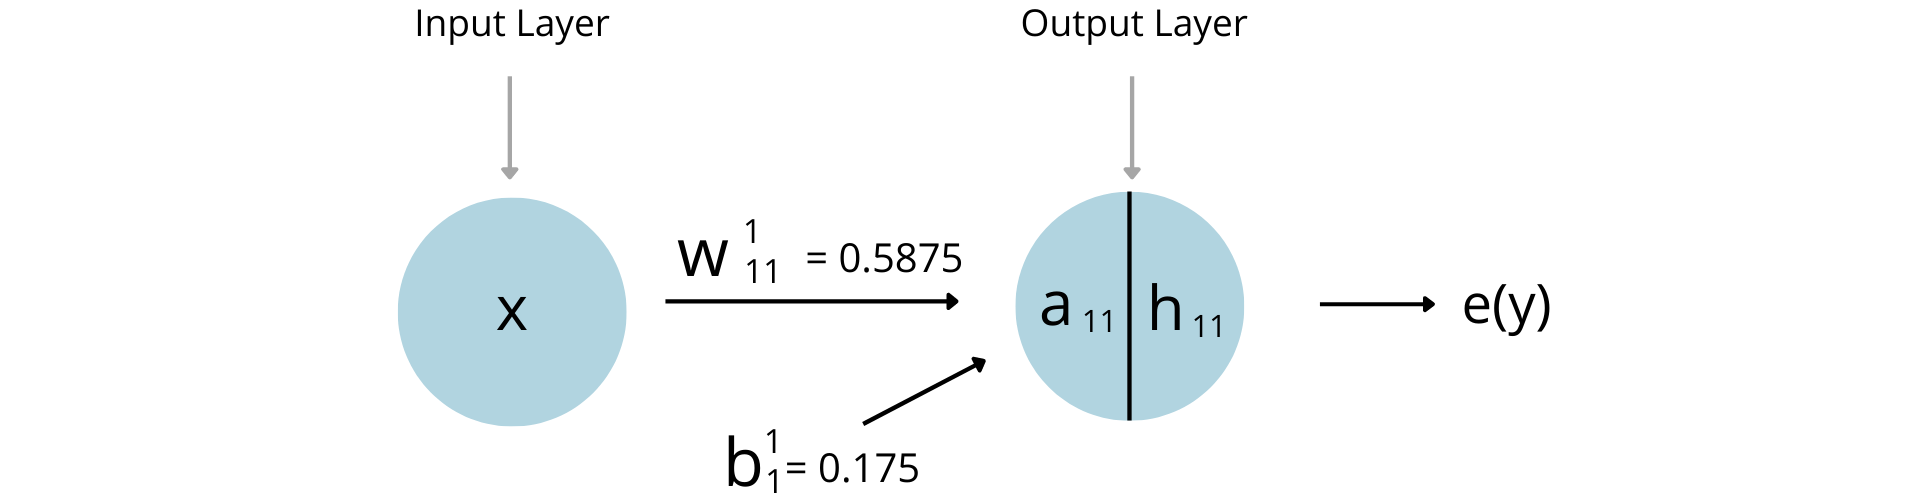

In [5]:
Image("../input/notebooknnimages/2.png")

Now we have updated the weight and bias of the neural network, it should make better predictions. Let's perform another forward pass to see if that is the case. 

$$ {f(x)} = {x \cdot w_{11}^1 + b_{1}^1} $$

$$ = 0.1 \cdot 0.5875 + 0.175 = 0.23375 $$
$$ = 0.3 \cdot 0.5875 + 0.175 = 0.35125 $$
$$ = 0.6 \cdot 0.5875 + 0.175 = 0.5275 $$
$$ = 0.7 \cdot 0.5875 + 0.175 = 0.58625 $$

Then we evaluate how good the predictions are using 1/2 * MSE.

$$e(y) =  \frac{1}{2}{(y - \hat{y})^2}$$

$$
e(y) = \frac{1}{2}
(\begin{pmatrix} 0.20 \\ 0.25 \\ 0.40 \\ 0.70 \end{pmatrix} - 
\begin{pmatrix} 0.23375 \\ 0.35125 \\ 0.5275 \\ 0.58625 \end{pmatrix})^2 = 
\frac{1}{2}(\begin{pmatrix}-0.03375\\-0.10125\\ -0.1275\\ 0.11375\end{pmatrix})^2= 
\frac{1}{2} \cdot {0.040585} = 
0.0202925
$$

Wow! We were able to improve the error function from ~0.08 to ~0.02 in one epoch. In theory, we would keep updating the weight and bias until the we stop improving on the error function. There are other things to consider in the real world such as overfitting the training data and using a validation set, but we will skip over this for now. Let's visualize the predictions after 1 epoch.

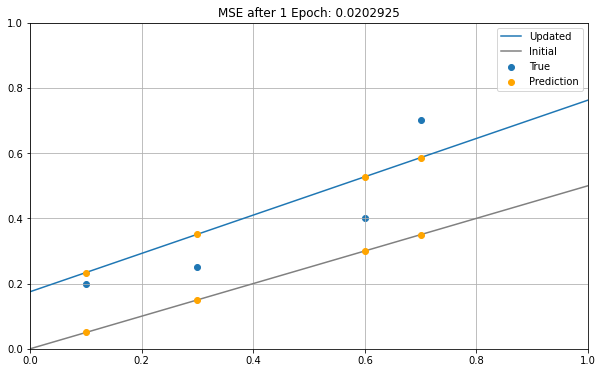

In [6]:
w11 = 0.5875
b11 = 0.175
second_predictions = [0.23375, 0.35125, 0.5275, 0.58625]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, b11), slope=w11, label="Updated")
ax.axline((0, init_b11), slope=init_w11, c='grey', label='Initial')
ax.scatter(df['x'], df['y'], label="True")
ax.scatter(df['x'], second_predictions, zorder=3, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, c='orange')
ax.set_title("MSE after 1 Epoch: {}".format(0.0202925))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.legend()
ax.grid()
plt.show()

I briefly mentioned before how this model is a simple linear regression model. This is because we are using a linear activation function, a single input and single output node. If we increase the number of input nodes to increasing powers of x, we can build a linear regression model to any degree. This is pretty cool and is a great way to grasp neural networks if you already understand linear regression models.

## 2. Slightly Less Simple Neural Network

In this section we will fit a neural network with two input nodes (x and x^2) and a single output node. Although still quite a simple network, this model will show how one can create a linear regression model to the 2nd degree using a neural network .

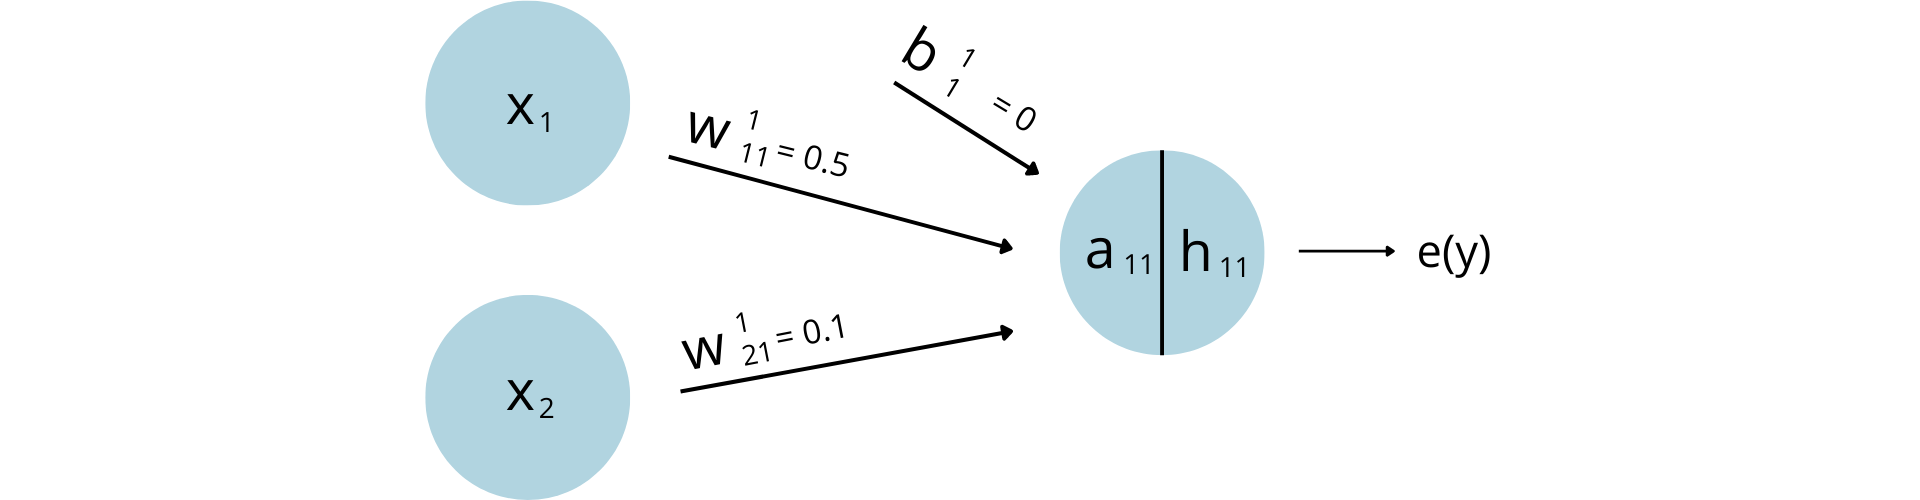

In [7]:
Image("../input/notebooknnimages/3.png")

#### Forward Pass

In this network the formula for the forward pass is slightly more complicated than the previous model.

$$ {f(x)} = h_{11}((w_{11}^1*x_{1} + w_{21}^1*x_{2}) + b_{1}^1) $$

$$ h_{11}(x) =  x $$

$$ {f(x)} = w_{11}^1 \cdot x_{1} + w_{21}^1 \cdot x_{2} + b_{1}^1 $$

Using our training data we can solve the equation for each data point. x1 is simply x, and x2 is x-squared.

$$ {w_{11}^1} = 0.5, {w_{21}^1} = 0.1,{b_{1}^1} = 0$$

$$ = 0.5 \cdot 0.1 + 0.1 \cdot (0.1 \cdot 0.1) + 0 = 0.051 $$
$$ = 0.5 \cdot 0.3 + 0.1 \cdot (0.3 \cdot 0.3) + 0 = 0.159 $$
$$ = 0.5 \cdot 0.6 + 0.1 \cdot (0.6 \cdot 0.6) + 0 = 0.336 $$
$$ = 0.5 \cdot 0.7 + 0.1 \cdot (0.7 \cdot 0.7) + 0 = 0.399 $$

Then as we did with the previous model, we evaluate the predictions with an error function (1/2 * MSE). 

$$e(y) =  \frac{1}{2}{(y - \hat{y})^2}$$

$$
e(y) = \frac{1}{2}
(\begin{pmatrix} 0.20 \\ 0.25 \\ 0.40 \\ 0.70 \end{pmatrix} - 
\begin{pmatrix} 0.051 \\ 0.159 \\ 0.336 \\ 0.399 \end{pmatrix})^2 = 
\frac{1}{2}(\begin{pmatrix}0.149\\ 0.091\\ 0.064\\ 0.301\end{pmatrix})^2= 
\frac{1}{2} \cdot {0.125179} = 
0.0625895
$$

In the following plot, we can see that there is a slight convexity in the line (upwards curve) as we have added the second input parameter.

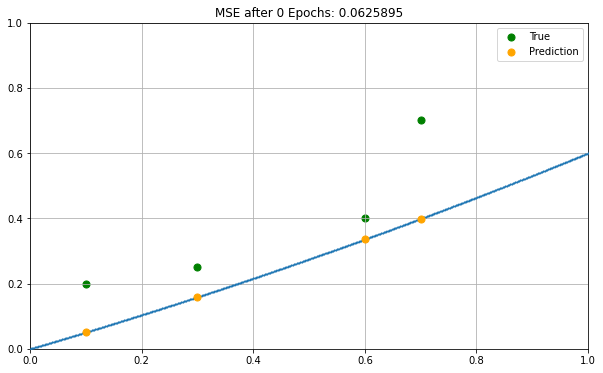

In [8]:
init_predictions = [0.051, 0.159, 0.336, 0.399]

init_w111 = 0.5
init_w112 = 0.1
init_b11 = 0

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.set_title("MSE after 0 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

### Backpropagation

Now we have made initial predictions, we can backpropagate to calculate how we should change the weights and bias. The three partial derivative chains that we need to calculate are as follows.

$$ \frac{\partial e}{\partial w_{11}^1} = \frac{\partial e}{\partial h_{11}} \cdot \frac{\partial h_{11}}{\partial a_{11}} \cdot \frac{\partial a_{11}}{\partial w_{11}^1} $$

$$ \frac{\partial e}{\partial w_{21}^1} = \frac{\partial e}{\partial h_{11}} \cdot \frac{\partial h_{11}}{\partial a_{11}} \cdot \frac{\partial a_{11}}{\partial w_{21}^1} $$

$$ \frac{\partial e}{\partial b_{1}^1} = \frac{\partial e}{\partial h_{11}} \cdot \frac{\partial h_{11}}{\partial a_{11}} \cdot \frac{\partial a_{11}}{\partial b_{1}^1} $$

These first two partial derivatives are identical to those that we calculated with the previous model.

$$ \frac{\partial e}{\partial h_{11}} =  -(y - \hat{y}) $$ 

$$ \frac{\partial h_{11}}{\partial a_{11}} = \frac{\partial a_{11}}{\partial a_{11}} = 1 $$

The final partials derivatives in each chain are as follows.

$$ \frac{\partial a_{11}}{\partial w_{11}^1} = \frac{\partial (w_{11}^1 \cdot x_{1} + w_{21}^1 \cdot x_{2} + b_{1}^1)}{\partial w_{11}^1} = x_{1} $$

$$ \frac{\partial a_{11}}{\partial w_{21}^1} = \frac{\partial (w_{11}^1 \cdot x_{1} + w_{21}^1 \cdot x_{2} + b_{1}^1)}{\partial w_{21}^1} = x_{2} $$

$$ \frac{\partial a_{11}}{\partial b_{1}^1} = \frac{\partial (w_{11}^1 \cdot x_{1} + w_{21}^1 \cdot x_{2} + b_{1}^1)}{\partial b_{1}^1} = 1 $$

Then we can put each derivative chain together, solve for each data point, and take the average for each chain!

$$ \frac{\partial e}{\partial w_{11}^1} = (-(y - \hat{y})) \cdot 1 \cdot (x1) $$

$$ = (-(0.20 - 0.051)) \cdot 1 \cdot (0.1) = -0.0149$$
$$ = (-(0.25 - 0.159)) \cdot 1 \cdot (0.3) = -0.0273$$
$$ = (-(0.40 - 0.336)) \cdot 1 \cdot (0.6) = -0.0384$$
$$ = (-(0.70 - 0.399)) \cdot 1 \cdot (0.7) = -0.2107$$

$$ AVG([-0.0149, -0.0273, -0.0384, -0.2107]) = -0.072825$$

$$ \frac{\partial e}{\partial w_{21}^1} = (-(y - \hat{y})) \cdot 1 \cdot (x2) $$

$$ = (-(0.20 - 0.051)) \cdot 1 \cdot (0.01) = -0.00149$$
$$ = (-(0.25 - 0.159)) \cdot 1 \cdot (0.09) = -0.00819$$
$$ = (-(0.40 - 0.336)) \cdot 1 \cdot (0.36) = -0.02304$$
$$ = (-(0.70 - 0.399)) \cdot 1 \cdot (0.49) = -0.14749$$

$$ AVG([-0.00149, -0.00819, -0.02304, -0.14749]) = -0.0450525$$


$$ \frac{\partial e}{\partial b_{1}^1} = (-(y - \hat{y})) \cdot 1 \cdot 1 $$

$$ = (-(0.20 - 0.051)) \cdot 1 \cdot 1 = -0.149$$
$$ = (-(0.25 - 0.159)) \cdot 1 \cdot 1 = -0.091$$
$$ = (-(0.40 - 0.336)) \cdot 1 \cdot 1 = -0.064$$
$$ = (-(0.70 - 0.399)) \cdot 1 \cdot 1 = -0.301$$

$$ AVG([0.149, 0.091, 0.064, 0.301]) = -0.15125$$

Next, we update the weights and the biases using the same formulas used in the previous example.

$$ {*w_{x}^y} = w_{x}^y - \alpha (\frac{\partial e}{\partial w_{x}^y}) $$

$$ {*b_{x}^y} = b_{x}^y - \alpha (\frac{\partial e}{\partial b_{x}^y}) $$

We will use a learning rate of 1 again. This triggers a large jump in the parameters and is good for visualizing the change in the model. Typically you would set a lower learning rate and perform multiple epochs.

$$ {*w_{11}^1} = 0.5 - 1(-0.072825) = 0.572825$$

$$ {*w_{21}^1} = 0.1 - 1(-0.0450525) =  0.1450525$$

$$ {*b_{1}^1} = 0 - 1(-0.15125) = 0.15125$$


#### Another Forward Pass

Finally, we perform another forward pass to see if the model improved.

$$ {w_{11}^1} = 0.572825, {w_{21}^1} = 0.1450525,{b_{1}^1} = 0.15125$$

$$ = 0.572825 \cdot 0.1 + 0.1450525 \cdot (0.1 \cdot 0.1) + 0.15125 = 0.209983 $$
$$ = 0.572825 \cdot 0.3 + 0.1450525 \cdot (0.3 \cdot 0.3) + 0.15125 = 0.336152 $$
$$ = 0.572825 \cdot 0.6 + 0.1450525 \cdot (0.6 \cdot 0.6) + 0.15125 = 0.547163 $$
$$ = 0.572825 \cdot 0.7 + 0.1450525 \cdot (0.7 \cdot 0.7) + 0.15125 = 0.623303 $$

$$
e(y) = \frac{1}{2}
(\begin{pmatrix} 0.20 \\ 0.25 \\ 0.40 \\ 0.70 \end{pmatrix} - 
\begin{pmatrix} 0.209983 \\ 0.336152 \\ 0.547163 \\0.623303 \end{pmatrix})^2 = 
\frac{1}{2}(\begin{pmatrix}-0.009983\\ -0.086152\\ -0.147163\\ 0.076697\end{pmatrix})^2= 
\frac{1}{2} \cdot {0.03506} = 
0.01753
$$

Great, the we reduced the error! In the following cell we can see how much the model improved from the initial predictions. The more we train the model the closer we should get to fitting the data points exactly.

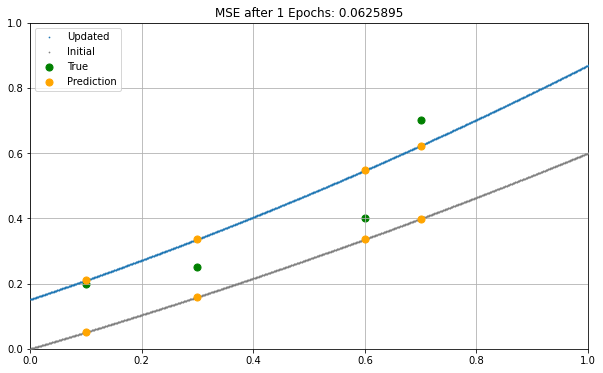

In [9]:
second_predictions = [0.209983, 0.336152, 0.547163, 0.623303]

w111 = 0.572825
w112 = 0.1450525
b11 = 0.15125

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

init_line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]
second_line = [forward_pass(i, w111, w112, b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), second_line, zorder=3, s=1/2,label='Updated')
ax.scatter(np.linspace(0,1,1000), init_line, zorder=3, c='grey', s=1/2, label='Initial')
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], second_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange')
ax.set_title("MSE after 1 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

### Training a Neural Network with Code

Now that we have gone through all the mathematics, I want to show you how to train a model using Python. The computation we performed above can be repeated thousands of times a second using a computer. The following code block defines a neural network class for the model we trained by hand above. I encourage you to look through the class functions and code comments to confirm this.

In [10]:
class SimpleNeuralNetwork():
    def __init__(self, X, Y):
        self.w111 = 0.5
        self.w112 = 0.1
        self.b11 = 0
        self.preds = []
        self.lr = 1
        self.X = X
        self.Y = Y
        
    def forward_pass(self):
        self.preds = []
        for x in self.X:
            y_hat = self.w111*x + self.w112*(x*x) + self.b11
            self.preds.append(y_hat)
    
    def calc_error(self):
        # 1/2 * MSE
        return 1/2 * sum([(y - yhat)**2 for y, yhat in zip(self.Y, self.preds)])
        
    def back_prop(self):
        w111s = []
        w112s = []
        b11s = []
        
        # -- Chained partial derivatives --
        for x, y, yhat in zip(self.X, self.Y, self.preds):
            w111s.append((-(y - yhat)) * 1 * (x))
            w112s.append((-(y - yhat)) * 1 * (x**2))
            b11s.append((-(y - yhat)) * 1 * 1)

        w111_change = sum(w111s)/len(w111s)
        w112_change = sum(w112s)/len(w112s)
        b11_change = sum(b11s)/len(b11s)

        # -- Updating weights and biases --
        self.w111 = self.w111 - self.lr * (w111_change)
        self.w112 = self.w112 - self.lr * (w112_change)
        self.b11 = self.b11 - self.lr * (b11_change)
        
    def plot_model(self, epoch, plot_num, nrows, ncols):
        line = [self.w111*i + self.w112*(i*i) + self.b11 for i in np.linspace(0,1,1000)]
        ax = plt.subplot(nrows, ncols, plot_num+1)
        ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
        ax.scatter(self.X, self.Y, s=50, c='green', label="True")
        ax.scatter(self.X, self.preds, zorder=3, s=50, c='orange', label="Prediction")
        ax.set_title("Epoch: {}, Error: {:.5f}".format(epoch, self.calc_error()))
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.grid()
        ax.legend(loc = "upper left")

First, we instantiate the class and pass in our x and y values. Then we can then iteratively perform forward passes and backward propagation to update the model parameters. In the following example we are training the model for 3000 epochs, and logging the model predictions every 500 epochs.

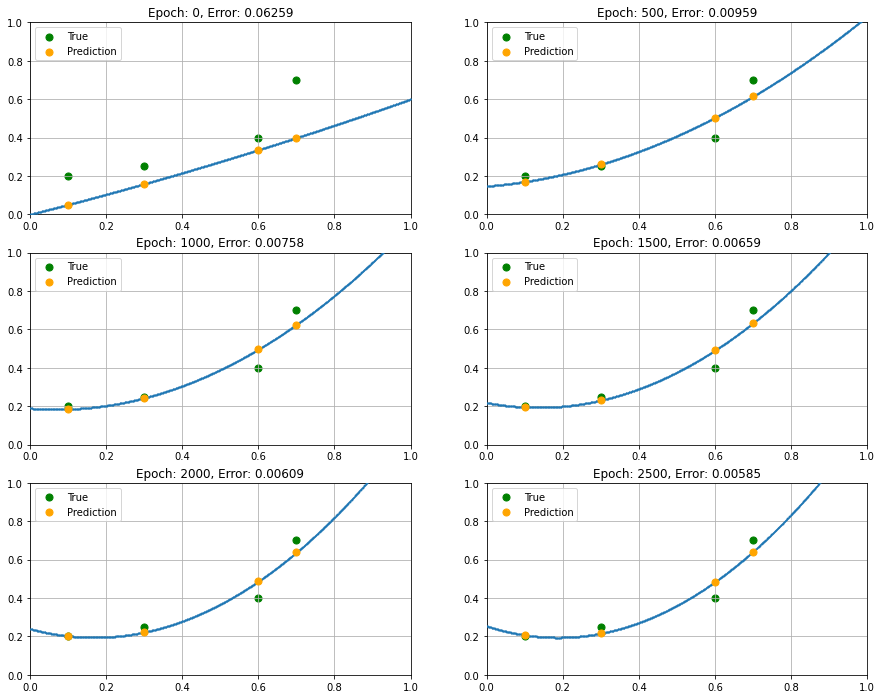

In [11]:
NN = SimpleNeuralNetwork(df['x'].values, df['y'].values)
plot_num = 0
plot_y = 0
fig, ax = plt.subplots(figsize=(15, 12), nrows=3, ncols=2)

for epoch in range(2501):
    NN.forward_pass()
    if epoch%500 == 0:
        NN.plot_model(epoch, plot_num, nrows=3, ncols=2)
        plot_num += 1
        
    NN.back_prop()
    
plt.show()

As we can see the model continuously improves on its predictions, and after 2500 epochs we get a highly accurate model. As the model mirrors a linear regression model to the 2nd degree, it is limited to a convex function with scales and transformations dependant on the model parameters. The data points are not organized in an exact convex function and therefore we would need to increase the number of input nodes to fit the data exactly.

### Final Thoughts

I think the math behind neural networks is pretty awesome. Hopefully working through a couple examples in this article with some sample data helped showcase this. Doing so with linear regression models is very intuitive place to start, but the real predictive power of neural networks is unleashed when you add multiple layers and non-linear activation functions. 

For more information on I have included some good resources below.

<!-- Code for this article can be found here.  -->

### Links/Resources

- https://hmkcode.com/ai/backpropagation-step-by-step/
- https://www.javatpoint.com/pytorch-backpropagation-process-in-deep-neural-network
- https://www.baeldung.com/cs/deep-learning-bias-backpropagation
- https://www.jeremyjordan.me/neural-networks-training/
- https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/
- https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
- https://datascience.stackexchange.com/questions/19272/deep-neural-network-backpropogation-with-relu